## Título: VISIBILIZACIÓN GRÁFICA DE LAS VÍCTIMAS DE LA DICTADURA (1976-1983) A PARTIR DE DIFERENTES VARIABLES

### Visualización

In [1]:
print("=======================================================")
for i in range(3):
    print("30.000 compañeros detenenidos  desaparecidos!")
    print("PRESENTES")
print("AHORA!")
print("Y SIEMPRE")
print ("")
print ("")
print("=======================================================")

30.000 compañeros detenenidos  desaparecidos!
PRESENTES
30.000 compañeros detenenidos  desaparecidos!
PRESENTES
30.000 compañeros detenenidos  desaparecidos!
PRESENTES
AHORA!
Y SIEMPRE




#### 3.1 Introducción
#### 3.2 Lectura de datos
#### 3.3 Visualización
##### 3.3.1 Geolocalización de Centros Clandestinos de Detención, Tortura y Exterminio.
##### 3.3.2 Lugar de secuestro, año y cantidad de casos.
##### 3.3.3 Cantidad de asesinados por Nacionalidad de la víctima.
##### 3.3.4 Cantidad de asesinadxs por Genero.
##### 3.3.5 Cantidad de asesinadxs por Oficio.
##### 3.3.6 Gráfica de barras de cantidad de desaparecidxs por provincia de nacimiento.
##### 3.3.7 Cantidad de asesinadxs por nivel de estudios.
##### 3.3.8 Asesinados por organizaciones de militancia.
##### 3.3.9 Relación de lugar de secuestro y asesinato.
##### 3.3.10 Tratamiento del campo edad al momento de la desaparición.
##### 3.3.11 Cantidad de denuncias por Año.
#### 3.4 Recomendaciones

## 3.1 Introducción
Las producciones gráficas se llevaron a cabo con el uso de la libreria plotly (https://plot.ly/). Dicha biblioteca permite la generación de gráficas interactivas de código abierto, admitiendo a más de 40 tipos de gráficos únicos que cubren una amplia gama de casos de uso estadísticos, financieros, geográficos, científicos y tridimensionales. Dicha herramienta se encuentra construida en JavaScript (plotly.js), plotly.py y permite a los usuarios de Python crear visualizaciones interactivas basadas en la web que se pueden mostrar en los Jupyter notebooks, guardar en archivos HTML independientes o servir como parte de Python.
Ademas Plotly ofrece la posibilidad de crear mapas georeferenciados. Permitiendo la manipulación de los datos de manera de lograr gráficas interactivas y de fácil lectura.

### 3.2 Lectura de datos
Como primer paso para la producción de Graficos vamos a cargar dos bases de datos. Pro un lado la base de datos enriquecida completa (anteriormente lograda) y por otro la base de datos de centros de detención. Esta ultima base ya se encontraba generada previamente.

In [1]:
#Importamos la librería 'pandas'
import pandas as pd
#Importamos la librerías necesarias para la visualización
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


In [2]:
#!!!!!!!!!!!!!AGREGAR UBICACION DE TU COMPUTADORA!!!!!!!!!!!!!!!!!!!!
path ='/mnt/28768037768007B0/projects/victimas/'

#Cargamos la base de datos con todos los registros generada con el codigo previo
BD=pd.read_csv(path+"/mapeos/dataset_completos/datasets/BD_RUVTE2020Enriquecida.csv", sep=",")

#Cargamos la base de datos con la geolocalización de los centros clandestinos
centros = pd.read_csv(path+"/mapeos/dataset_completos/datasets/centros_clandestinos_detencion.csv", sep=",")

## 3.3 Visualización

### 3.3.1 Geolocalización de Centros Clandestinos de Detención, Tortura y Exterminio.
Este gráfico muestra la ubicación y dimensiona no solo en números la cantidad sino también la concentración de ciertos puntos del país,   los Centros Clandestinos de Detención, Tortura y Exterminio, también llamados CCDTyE —o CCDyE o CCD— por sus siglas. 
Los CCD eran establecimientos, principalmente policiales o militares, que pasaron a ser sede de actividades clandestinas y empleados por el aparato represivo del estado para alojar a las personas privadas ilegalmente de su libertad e interrogarlas, torturarlas y eventualmente asesinarlas. Los primeros CCD fueron instalados en 1975, antes del golpe militar. El primer CDD se instala en la «Escuelita» de Famaillá, Tucumán. “El Campito” es el primer CDD de la provincia de Buenos Aires. 
En 1976 llegaron a existir 610 Centros Clandestinos de Detención en la Argentina, pero muchos de ellos fueron temporarios y circunstanciales.
Más información :
- https://www.ecured.cu/Centro_clandestino_de_detenci%C3%B3n_(Argentina) 
- http://www.desaparecidos.org/arg/centros/

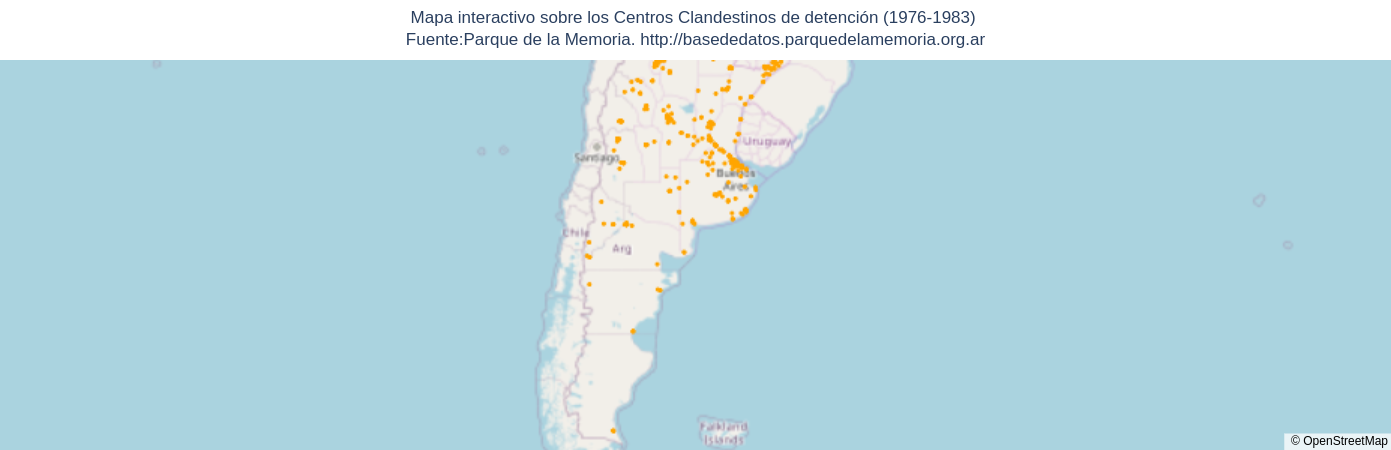

In [7]:
#Creammos grafica
fig = px.scatter_mapbox(centros, lat="lat", lon="lon", hover_name='denominacion', hover_data=['ubicacion', 'espacio_de_memoria', 'lugar_emplazamiento_propiedad'],
                        color_discrete_sequence=["orange"], zoom=3, height=680, center=dict(lat=-41,lon=-62))
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.update_layout(
    title={
        'text': "Mapa interactivo sobre los Centros Clandestinos de detención (1976-1983) <br>Fuente:Parque de la Memoria. http://basededatos.parquedelamemoria.org.ar</br>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-1_Centros.html', include_plotlyjs="cdn", full_html=False)

### 3.3.2 Lugar de secuestro, año y cantidad de casos.
Intentamos mostrar con un mapa interactivo los lugares de secuestro por año y la variación de la cantidad de estos, teniendo en cuenta que trabajamos con un número menor a los treinta mil, hay muchos casos con faltante de datos del lugar de su secuestro, pero vemos un abultado número de puntos concentrados en regiones geográficas específicas.
Cada punto, no es solo un punto,  fueron personas y de cada una de ellas hay una historia.
Primeramente tratamos los datos agrupandolos por lugar y a su vez en un segundo grupo de año. Ambos fueron contabilizados y de esta forma se pudo obtener la cantidad de victimas por año y lugar de secuestro o detención.

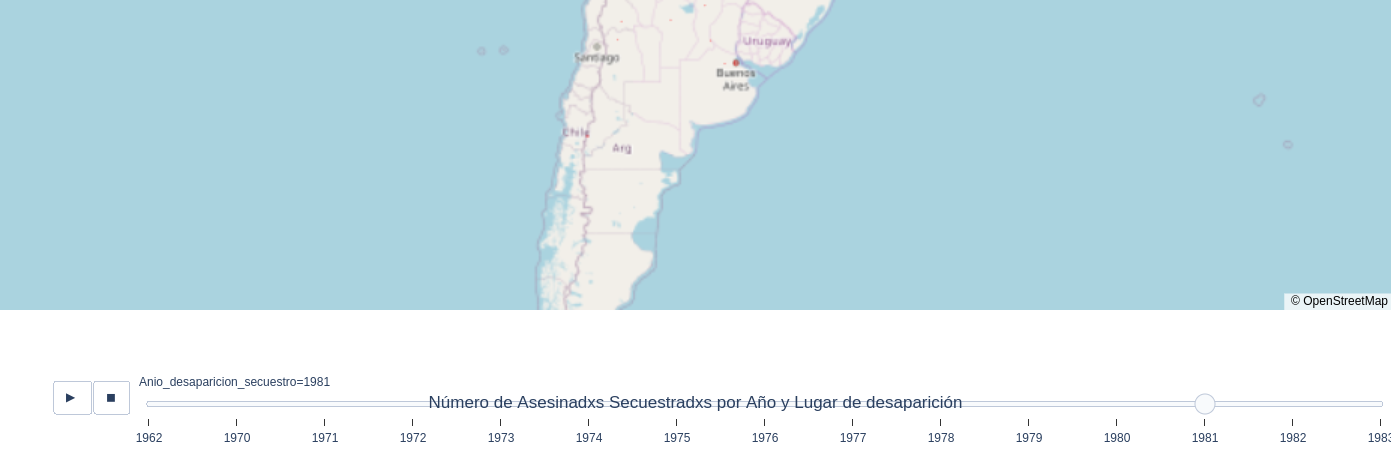

In [10]:
#Tratamos la información agrupando los datos por latitud, longitud y año de desaparición
D2= BD.groupby(['Latitud','Longitud','Anio_desaparicion_secuestro']).count().reset_index() 

D2=D2.rename(columns={'anio_denuncia': 'Cantidad'})#Cambiamos el nombre del nuevo dateframe

D2=D2.iloc[:,0:4]#eliminamos el resto de columnas

D2.sort_values(by=['Anio_desaparicion_secuestro'], inplace=True,ascending=True)#ordenamos de manera ascendiente los años

#Eliminamos las filas en las cuales no pudo encontrar las coordenadas :(
D2_nodata = D2[ D2['Latitud'] ==1 ]

D2 = D2.drop(D2_nodata.index, axis=0)
    
D2=D2.drop([653,28,677,823])#elimina 4 celdas que no contienen años (odio esta parte)

##Grafica en mapa
fig = px.scatter_mapbox(D2, lat="Latitud", lon="Longitud",  size="Cantidad", animation_frame="Anio_desaparicion_secuestro", #, range_color=[0,100],color="Cantidad",
                   size_max=70, zoom=3, height=680, center=dict(lat=-41,lon=-62), color_discrete_sequence=["Red"],opacity=0.3)#color_continuous_scale=px.colors.cyclical.IceFire,
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    title={
        'text': "Número de Asesinadxs Secuestradxs por Año y Lugar de desaparición",
        'y':0.12,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-2_Desaparecidos.html', include_plotlyjs="cdn", full_html=False)

### 3.3.3 Cantidad de asesinados por Nacionalidad de la víctima.
Un gráfico que nos sorprendió ya que no esperábamos ver personas de tantos países diferentes. Los motivos quizás no lo sepamos o quizás si, capaz fueron víctimas por botines de guerra o capaz militaban contra la dictadura o simplemente fueron víctimas por antisemitismo, pero la gráfica demuestra la diversidad de víctimas de distintas nacionalidades, no quisimos dejar pasar.

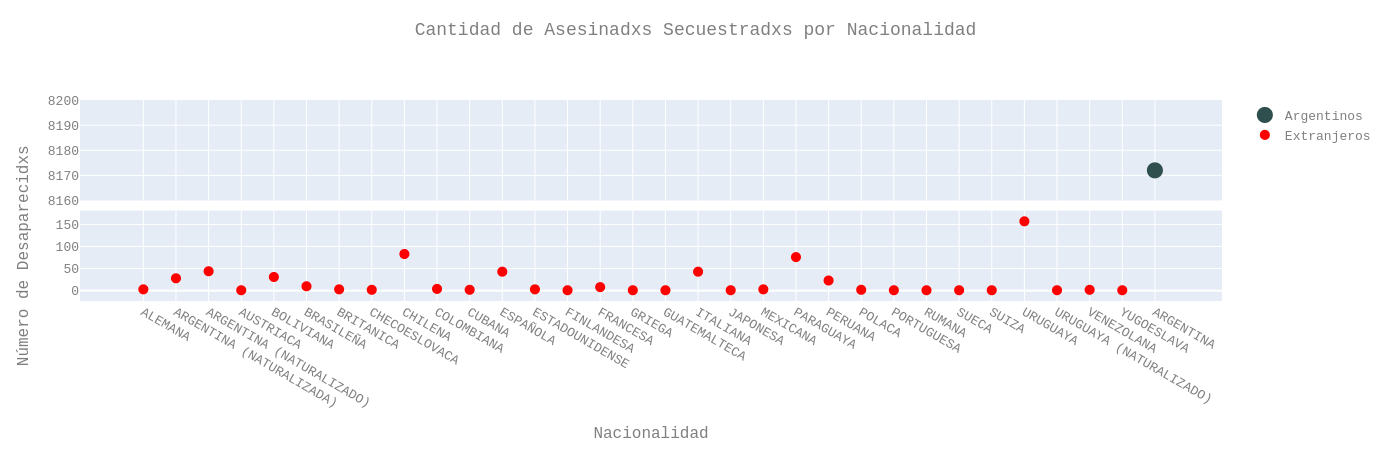

In [10]:
#Cantidad de desaparecidos por nacionalidad
D3=BD.groupby('nacionalidad').count().reset_index()
D3=D3.iloc[:,0:2]
D3=D3.rename(columns={'anio_denuncia': 'cantidad'})
D31=D3.iloc[[1]]#extraigo argentina

D3=D3.drop([1],axis=0)#Elimino argentina

#Inicio grafica
trace1 = go.Scatter(
    x=D3['nacionalidad'],
    y=D3['cantidad'], mode='markers', name="Extranjeros",marker=dict(
            color='Red',size=10)
)
trace2 = go.Scatter(
    x=D31['nacionalidad'],
    y=D31['cantidad'],
    yaxis="y2",mode='markers',name="Argentinos",marker=dict(
            color='DarkSlateGrey',size=16)
)

data = [trace1, trace2]
layout = go.Layout(
    yaxis=dict(
        domain=[0, 0.45]
    ),
    legend=dict(
        traceorder="reversed"
    ),
    yaxis2=dict(
        domain=[0.5, 1], range=[8160, 8200]
    )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    xaxis_title="Nacionalidad",
    yaxis_title="Número de Desaparecidxs",
    font=dict(
        family="Courier New, monospace",
        size=11,
        color="#7f7f7f"
    )
)
fig.update_layout(
    title={
        'text': "Cantidad de Asesinadxs Secuestradxs por Nacionalidad",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=13,
        color="#7f7f7f"
    )
)
fig.show()
#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-3_Nacionalidad.html', include_plotlyjs="cdn", full_html=False)

### 3.3.4 Cantidad de asesinadxs por género.
Analizando estas cantidades, comprobamos que más del 70 % de las víctimas de la dictadura fueron hombres, igualmente se nota que un gran porcentaje de mujeres sufrieron la acción represiva, agravada por los delitos sexuales, vejaciones y violaciones, con el adicional de que en muchos casos estaban embarazadas en el momento del secuestro.


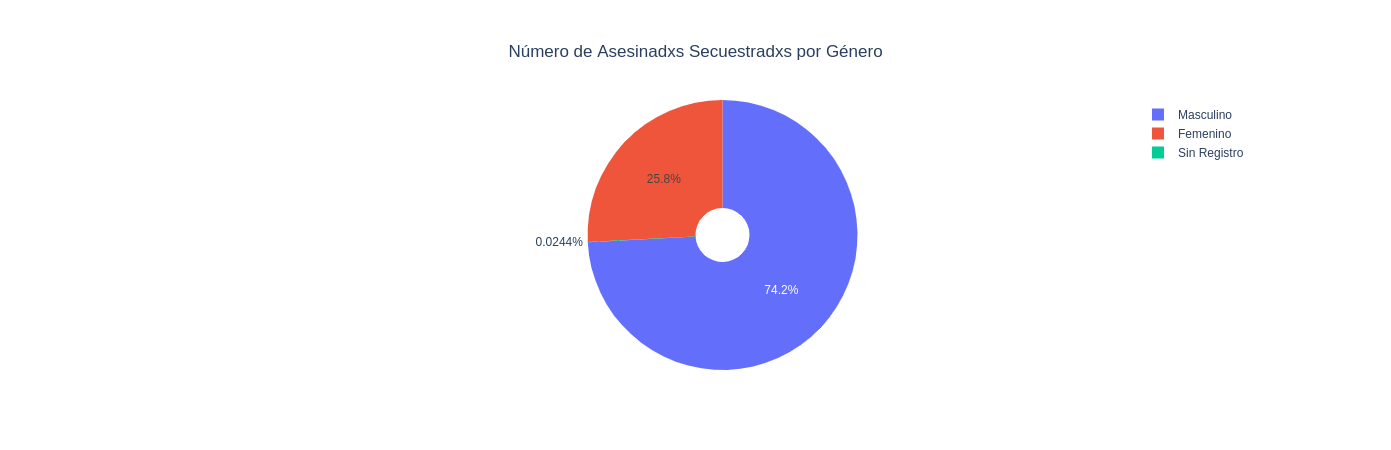

In [9]:
#Tratamos la informacion para agrupar por genero
D4=BD.groupby('Sexo').count().reset_index()
D4.replace({'Sexo' : 'f'}, 'Sin Registro', inplace=True)#Limpiamos errores de la Base de datos
D4.replace({'Sexo' : 'None'}, 'Sin Registro', inplace=True)#Limpiamos errores de la Base de datos lo incluimos en sin registro
D4=D4.iloc[:,0:2]#Extraemos los dos columnas iniciales
D4=D4.rename(columns={'anio_denuncia': 'cantidad'})#Cambiamos de nombre a la columna 'anio_denuncia'

#Codigo Gráfica. Diagrama de Torta
fig = go.Figure(data=[go.Pie(labels=D4['Sexo'], values=D4['cantidad'], hole=.2)])
fig.update_layout(
    title={
        'text': "Número de Asesinadxs Secuestradxs por Género",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-4_Genero.html', include_plotlyjs="cdn", full_html=False)

### 3.3.5 Cantidad de asesinadxs por Oficio.
Dado al gran abanico de gráficos que podemos formar con los datos que manejamos  nos pareció bueno mostrar las variantes de ocupación de las víctimas: estudiantes, obreros, profesionales de distintos ámbitos, entre otras ocupaciones que podemos reconocer.

In [12]:
#Organizamos los oficios por tipo y la cantidad de estos
D5=BD.groupby('Ocupaciones').count().reset_index()
D5=D5.iloc[:,0:2]
D5=D5.rename(columns={'anio_denuncia': 'cantidad'})

#Solo imprimiremos dependiendo de la ocupación la cantidad de desaparecidos-asesinados. Esto se debe a la gran cantidad de ocupaciones 
# resultantes que se obtiene de agrupar dicho campo.
print(D5)


                                            Ocupaciones  cantidad
0                                                               1
1                   (3er Año) Estudiante Universitario          1
2      (4to.año) Empleado en Vialidad Nacional. Estu...         2
3                  (graduado) Estudiante Universitario          1
4      (residente) en Residencia Hospital Ramos Mejí...         1
...                                                 ...       ...
3255   en Hospital Rawson (Córdoba) Estudiante Unive...         1
3256                             en Ingenio Fronterita          1
3257                                           en PAMI          1
3258                                            en YPF          5
3259                                            Óptico          2

[3260 rows x 2 columns]


### 3.3.6 Gráfica de barras de cantidad de desaparecidxs por provincia de nacimiento.
Resaltan en esta gráfica, que en su mayoría las víctimas del aparato Estatal represivo fueron de las provincia de Buenos Aires, Córdoba, Santa Fe y Tucumán. 

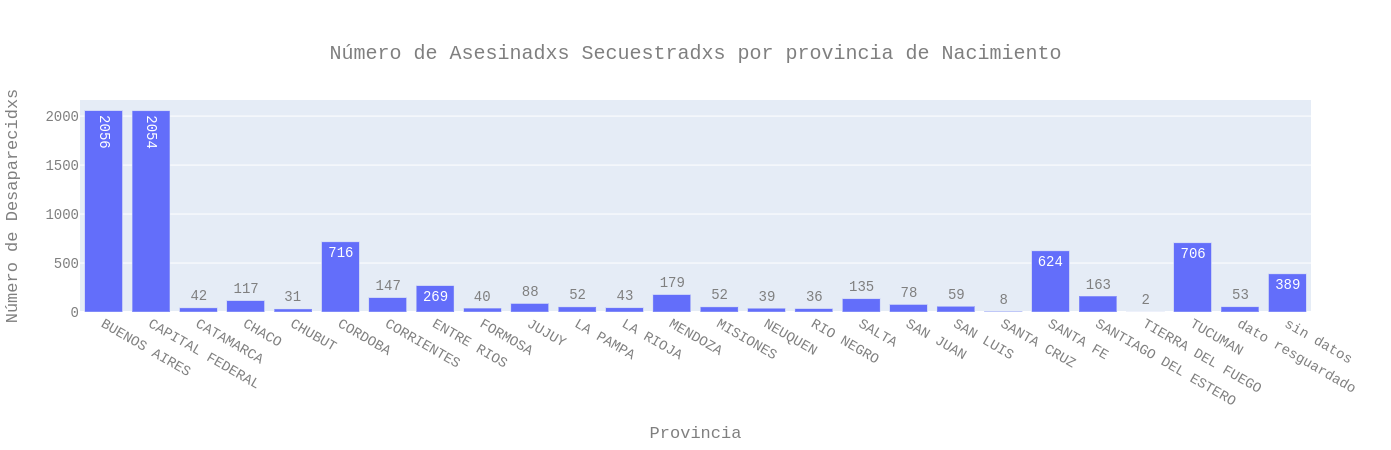

In [10]:
#Tratamos la base de datos para agrupar la cantidad de victimas y el año 
D6=BD.groupby("provincia_nacimiento").count().reset_index()
D6=D6.iloc[:,0:2]
D6=D6.rename(columns={'anio_denuncia': 'Cantidad'})

# Ploteamos la grafica
fig = go.Figure(data=[go.Bar(
            x=D6['provincia_nacimiento'], y=D6['Cantidad'],
            text=D6['Cantidad'],
            textposition='auto',
        )])
fig.update_layout(
    xaxis_title="Provincia",
    yaxis_title="Número de Desaparecidxs",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)
fig.update_layout(
    title={
        'text': "Número de Asesinadxs Secuestradxs por provincia de Nacimiento",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-6_Provincia.html', include_plotlyjs="cdn", full_html=False)

### 3.3.7 Cantidad de asesinadxs por nivel de estudios.
Siguiendo la linea de oficios nos centramos en las víctimas que estudiaban y visualizar las variantes de estas ya que un gran número de estudiantes protagonizaron la resistencia contra el golpe militar, además de que las organizaciones populares armadas, estaban constituidas por una mayoría de estudiantes secundarios y universitarios.


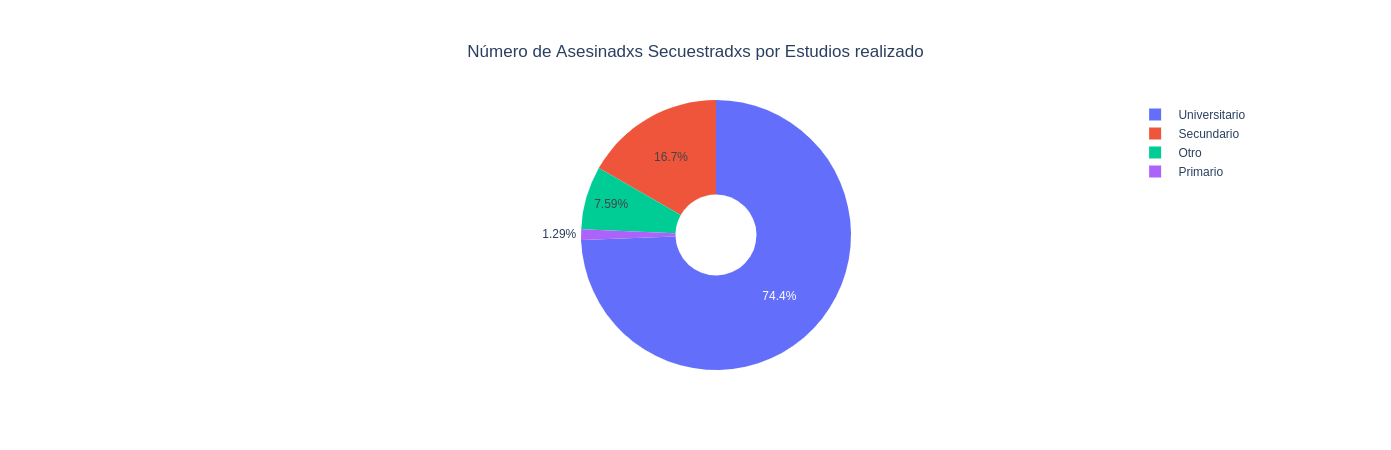

In [11]:
#En este caso vamnos agrupar dos veces. Primeramente la base de datos general por toda la columna de Estudios
D7=BD.groupby('Estudios').count().reset_index()
D7=D7.iloc[:,0:2]# localizacion de columnas que dejamos 
D7 = D7['Estudios'].apply(lambda x: pd.Series(x.split(':')))#Realizamos split a los dos puntos esto divide en los grandes subgrupos

# Respecto a la columna de Estudios, como se observa se encuentra dividida por primaria, secundaria, universitaria y otros.
# Haremos una sub agrupación en estos subgrupos
D7=D7.groupby(0).count().reset_index()
D7=D7.iloc[:,0:2]
D7=D7.rename(columns={0:'Estudios',1: 'cantidad'})#Le incorporamos los nombres a las columnas
D7=D7[D7['cantidad'] > 0]#Elimina filas erroneas sin cantidades

#Codigo de Gráfica
fig = go.Figure(data=[go.Pie(labels=D7['Estudios'], values=D7['cantidad'], hole=.3)])
fig.update_layout(
    title={
        'text': "Número de Asesinadxs Secuestradxs por Estudios realizado",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-7_Estudios.html', include_plotlyjs="cdn", full_html=False)

### 3.3.8 Asesinados por organizaciones de militancia.
No hay dudas de que la militancia y la organización fue el blanco del exterminio. Muchxs de lxs integrantes de las diferentes organizaciones, forman parte de las víctimas, las que más se reconocen son: el Ejército Revolucionario del Pueblo (ERP) y Montoneros.

In [34]:
#Agrupamos los datos por el campo Militacia
D8=BD.groupby('Militancia').count().reset_index()
dr=BD.groupby('Militancia')
D8=D8.iloc[:,0:2]
D8=D8['Militancia'].apply(lambda x: pd.Series(x.split('+')))
D8=D8.groupby(0).count().reset_index()

#D8=D8.rename(columns={0:'Militancia', 1 : 'cantidad'})
D8=D8.rename(columns={0:'Militancia'})
D8.replace({'Militancia' : ''}, 'Sin Registro', inplace=True)

# De la misma manera que los datos analizados por oficio, solo imprimiremos dependiendo de la militancia el numero de
# desaparecidos-asesinados. Esto se debe a la gran cantidad de agrupaciones resultantes que se obtiene de agrupar dicho campo.
print(D8['Militancia'].apply(lambda x: pd.Series(x.split('+'))))

                                                     0
0                Filosofía y Letras Historia del Arte 
1                                  Universitario: UNS 
2                                      Acción Católica
3                           Acción Católica Montoneros
4                                     Acción Comunista
..                                                 ...
555                          Vice Pte Del Pi, San Luis
556  Vicepresidente Com Int La Razón Juventud Peron...
557           Vicepresidente Soc De Fomento Del Barrio
558                                                Ypf
559  hasta El '75 Militante De Faj Partido Comunist...

[560 rows x 1 columns]


### 3.3.9 Relación de lugar de secuestro y asesinato.
El objetivo de esta gráfica es ver los últimos movimientos de las víctimas luego de su desaparición, es una gráfica muy interesante a pesar la ausencia de datos en ciertos casos de nuestro dataset. Podemos observar un gran número de personas con las que aún no se ha dado con su lugar de entierro

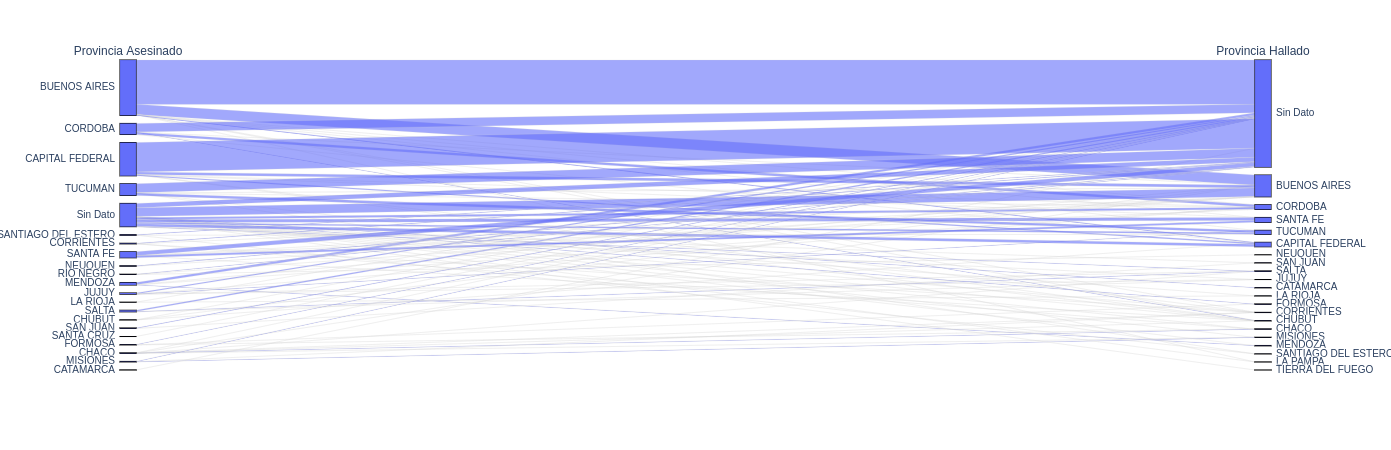

In [27]:
#Creamos una lista para buscar en las columnas 'fecha_lugar_detencion_secuestro' y 'fecha_lugar_asesinato_o_hallazgo_de_restos'
# extraemos las provincias y luego contabilizamos las repeticiones de las combinaciones posibles.

import plotly.graph_objects as go

#Provincias
Provincias=['BUENOS AIRES','CAPITAL FEDERAL','CATAMARCA','CHACO','CHUBUT','CORDOBA',
'CORRIENTES','ENTRE RÍOS','FORMOSA','JUJUY','LA PAMPA','LA RIOJA','MENDOZA','MISIONES',
'NEUQUEN','RIO NEGRO','SALTA','SAN JUAN','SANTA CRUZ','SANTA FE','SANTIAGO DEL ESTERO',
'TIERRA DEL FUEGO','TUCUMAN']


#Fecha desaparecido y Lugar
D9=BD['fecha_lugar_detencion_secuestro'].str.split(n=1,expand=True)



D9['Provincia Asesinado'] = D9[1].str.extract("(" + "|".join(Provincias) +")", expand=False)

#Fecha y Lugar de asesinato
D9_1=BD['fecha_lugar_asesinato_o_hallazgo_de_restos'].str.split(n=1,expand=True)

D9['Provincia Hallado'] = D9_1[1].str.extract("(" + "|".join(Provincias) +")", expand=False)

#D9=D9.dropna()
D9['Provincia Asesinado'] = D9['Provincia Asesinado'].replace(np.nan, 'Sin Dato')
D9['Provincia Hallado'] = D9['Provincia Hallado'].replace(np.nan, 'Sin Dato')

D9_2=D9.iloc[:,2:4]

fig = px.parallel_categories(D9_2)
fig.show()



#Vinculo=D9.groupby(['Provincia','Provincia_AH']).count().reset_index()

#Vinculo['Provincias_Vinculadas']=pd.DataFrame(Vinculo['Provincia']+' '+Vinculo['Provincia_AH'])

#fig = go.Figure(data=[go.Pie(labels=Vinculo['Provincias_Vinculadas'], values=Vinculo[0], hole=.5)])
#fig.update_layout(
#    title={
#        'text': "Porcentaje de Asesinadxs Secuestradxs por Provincia de Detención-Secuestro y Lugar de Asesinato o Hallazgo",
#        'y':0.9,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-9_Hallazgo.html', include_plotlyjs="cdn", full_html=False)

### 3.3.10 Tratamiento del campo edad al momento de la desaparición.

La siguiente gráfica refleja el número de desaparecidos asesinados en correlación a la edad informada en los registros de la base de datos con la que contamos. Es notable el rango de edad entre los 15 y 30 años de las personas que mayoritariamente sufrieron las consecuencias mas siniestras de la dictadura genocida.

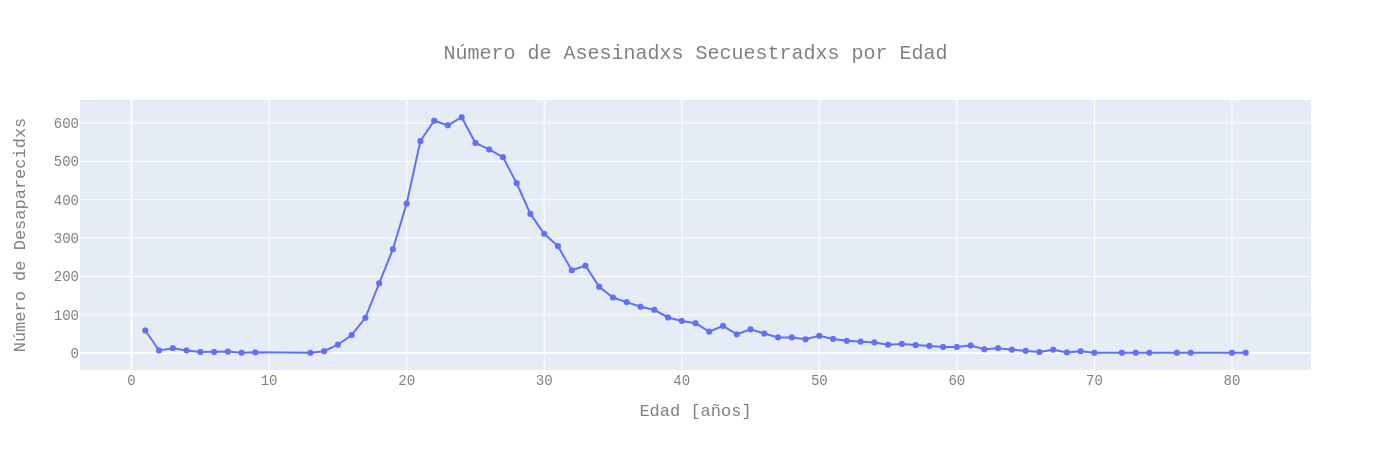

In [13]:
#Trataremos solo la columna 'edad_al_momento_del_hecho', filtraremos los datos erroneos y ordenaremos de manera decreciente el numero
# de desaparesidxs asesinadxs.

D10=BD.groupby('edad_al_momento_del_hecho').count().reset_index()
D10=D10.iloc[:,0:2]
D10=D10.rename(columns={'anio_denuncia': 'Cantidad'})

#
## new data frame with split value columns 
D101= D10["edad_al_momento_del_hecho"].str.split(" ", n = 1, expand = True) 

#
m={}
k={}
x={}
y={}
y1={}
c=0
n=0
for i in D10['edad_al_momento_del_hecho']:   
    if "años" in str(i).lower():#entra si dice en las celdas años
        k[n]=c
        n=n+1
        y[n]=D10['Cantidad'].iloc[c]
        x[n]=D10['edad_al_momento_del_hecho'].iloc[c]
    else:#entra cuando no dice años       
        y1[n]=D10['Cantidad'].iloc[c]
        m[n]=c
        n=n+1
    c=c+1

yy=sum(y1.values())-77-47#quito ultimos datos que no son menores de 1 año

D101 = pd.DataFrame(
    {'Edad': x,
     'Cantidad': y,
    })

new_row= {'Edad':'1 año', 'Cantidad': yy}

D101 = D101.append(new_row, ignore_index=True)


D101[['Num','e']]= D101["Edad"].str.split(" ", n = 1, expand = True) 
D101 = D101.astype({"Num": int})


D101.sort_values(by=['Num'], inplace=True, ascending=True)

#Grafico
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=D101['Num'], y=D101['Cantidad'],
                     mode='lines+markers',
                     name='lines+markers'))
fig.update_layout(
    xaxis_title="Edad [años]",
    yaxis_title="Número de Desaparecidxs",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)
fig.update_layout(
    title={
        'text': "Número de Asesinadxs Secuestradxs por Edad",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-10_Edad.html', include_plotlyjs="cdn", full_html=False)

### 3.3.11 Cantidad de denuncias por Año.
Por último presentamos el número de denuncias realizadas por año, en dondese nota una mayoría de denuncias al inicio de la democracia, con algunos picos en los años 90 y luego del 2001, quizás se correspondan concampañas y el fuerte trabajo de las organizaciones de Derechos Humanos que trabajan incanzablemente para que no haya Ni olvido ni perdón.

In [31]:
#De la misma manera que se trato anterirme se agrupara en este cas la columna'anio_denuncia'
D11=BD.groupby('anio_denuncia').count().reset_index()
D11=D11.iloc[:,0:2]
D11=D11.rename(columns={'tipificacion_ruvte': 'Cantidad','anio_denuncia':'Año de Denuncia'})


D111=D11.iloc[[0]]#extraigo argentina

D11=D11.drop([1],axis=0)#Elimino argentina

#Inicio grafica
denuncia1 = go.Scatter(
    x=D11['Año de Denuncia'],
    y=D11['Cantidad'], mode='markers',marker=dict(
            color='Red',size=10)
)
denuncia2 = go.Scatter(
    x=D111['Año de Denuncia'],
    y=D111['Cantidad'],
    yaxis="y2",mode='markers',marker=dict(
            color='Red',size=10)
)

data = [denuncia1, denuncia2]
layout = go.Layout(
    yaxis=dict(
        domain=[0, 0.45],range=[0, 200]#
    ),
  #  legend=dict(
  #      traceorder="reversed"
   # ),
    yaxis2=dict(
        domain=[0.5, 1],range=[6700, 6800]
    )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Cantidad",
    font=dict(
        family="Courier New, monospace",
        size=11,
        color="#7f7f7f",
        locati=0.5,
    )
)
fig.update_layout(
    title={
        'text': "Cantidad de Denuncias realizadas por Año",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=13,
        color="#7f7f7f"
    )
)
fig.update_layout(showlegend=False)
fig.update_xaxes(tick0=1984, dtick=1)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(position=0)
fig.show()

#Escribe la figura en la carpeta
fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-11_Anio.html', include_plotlyjs="cdn", full_html=False)

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Font: 'location'

    Valid properties:
        color

        family
            HTML font family - the typeface that will be applied by
            the web browser. The web browser will only be able to
            apply a font if it is available on the system which it
            operates. Provide multiple font families, separated by
            commas, to indicate the preference in which to apply
            fonts if they aren't available on the system. The
            plotly service (at https://plot.ly or on-premise)
            generates images on a server, where only a select
            number of fonts are installed and supported. These
            include "Arial", "Balto", "Courier New", "Droid Sans",,
            "Droid Serif", "Droid Sans Mono", "Gravitas One", "Old
            Standard TT", "Open Sans", "Overpass", "PT Sans
            Narrow", "Raleway", "Times New Roman".
        size

        

### 3.4 Recomendaciones
...